In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import curve_fit

In [2]:
system = 'Windows'

# folder_path = 'C:\\Users\AMO lab\Documents\Rydberg Data\\2023\\11\\22\\20ms'

if system == 'Mac':
    folder_path = '/Volumes/Users/AMO lab/Documents/Rydberg Data/2023/11/27/PGC'
else:
    folder_path1 = 'D:\\OneDrive - 南方科技大学\各种书面文件（培养方案里的）\\master thesis\\figures\\dipole trap parameters\\OD measurement as a function of power\\6' # 这是数据的
    folder_path2 = 'D:\\OneDrive - 南方科技大学\各种书面文件（培养方案里的）\\master thesis\\figures\\dipole trap parameters\\OD measurement as a function of power\\5' # 这个好像没用到

probe = plt.imread(folder_path1 + '\\' + 'probe.png').astype(np.float64)
bg = plt.imread(folder_path1 + '\\bg.png').astype(np.float64)
img = np.zeros((14, probe.shape[0],probe.shape[1]))
amp =  ['1','1.5','2','2.5','3','3.5','4','4.2','4.5','5','5.5','6','6.5','7'] 

for i in range(1,len(amp)):
    # print(i)
    if system == 'Mac':
        img_temp = plt.imread(folder_path1+ '/' + i)
    else:
        print('absorption_' + amp[i] + 'A.png')
        img_temp = plt.imread(folder_path1+ '\\absorption_' + amp[i] + 'A.png')
        img_temp = img_temp.astype(np.float64)
    img[i,:,:]=img_temp


absorption_1.5A.png
absorption_2A.png
absorption_2.5A.png
absorption_3A.png
absorption_3.5A.png
absorption_4A.png
absorption_4.2A.png
absorption_4.5A.png
absorption_5A.png
absorption_5.5A.png
absorption_6A.png
absorption_6.5A.png
absorption_7A.png


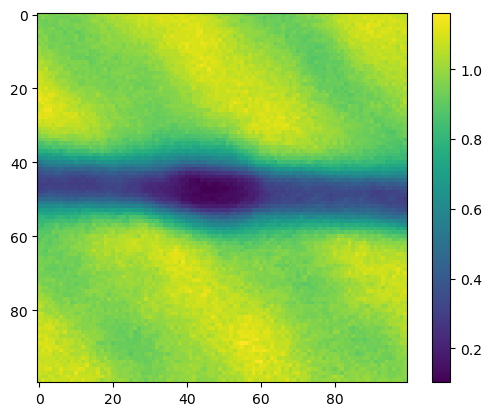

In [3]:
## crop to 400*400
# a = 490
# b = 890
# c = 570
# d = 970

a = 635
b = 735
c = 720
d = 820
img_crop = img[:,a:b,c:d]    # 这个是被吸收后的probe beam，第一列是1-14，代表那14张不同dipole trap power下的absorption image
probe_crop = probe[a:b,c:d]  # 这个是没被吸收的probe beam，即dipole trap off 时的probe beam
bg_crop = bg[a:b,c:d]        # 这是background

plt.imshow((img_crop[13,:,:]-bg_crop)/(probe_crop-bg_crop))
plt.colorbar()

(1200, 1920)
(14, 100, 10) (100, 10) (100, 10)


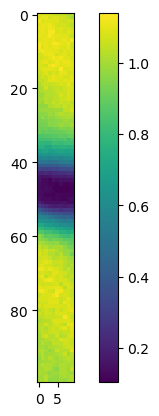

In [4]:
# Futher find the position

a2 = 0
b2 = 100
c2 = 40
d2 = 50 

img_OD = img_crop[:,a2:b2,c2:d2]
probe_OD = probe_crop[a2:b2,c2:d2]
bg_OD = bg_crop[a2:b2,c2:d2]

print(bg.shape)
print(img_OD.shape,probe_OD.shape, bg_OD.shape)

plt.imshow((img_OD[13,:,:]-bg_OD)/(probe_OD-bg_OD))
plt.colorbar()

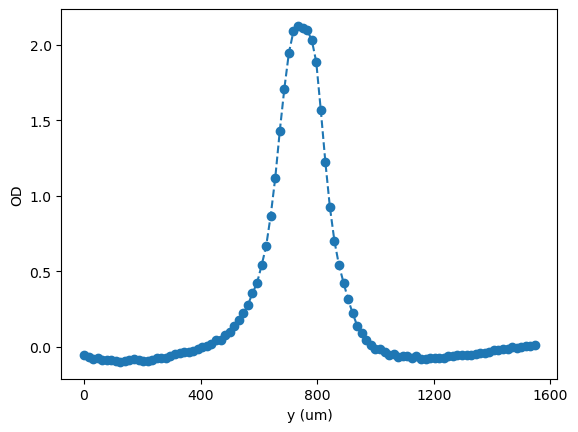

In [8]:
img_1D = img_OD.sum(axis = 2)
probe_1D = probe_OD.sum(axis = 1)
bg_1D = bg_OD.sum(axis = 1)
ab_1D = (img_1D - bg_1D) / (probe_1D - bg_1D)
x = np.arange(b2-a2) * 5.86 * 400/150
plt.plot(x,-np.log(ab_1D[13,:]),'o--',label = '6A')   # ab_1D[13,:]的13指的是power=6A的那一列

# plt.plot(x,-np.log(ab_1D[9,:]),'o--',label = '4A')
plt.xlabel('y (um)')
plt.ylabel('OD')
plt.xticks([0,400,800,1200,1600])
# plt.legend()
# plt.plot((img_1D[2,:] - bg_1D) / (probe_1D - bg_1D))
# plt.plot((img_1D[10,:] - bg_1D) / (probe_1D - bg_1D))
# plt.plot((img_1D[15,:] - bg_1D) / (probe_1D - bg_1D))
plt.savefig('dipole trap OD measurement.png',dpi=300)

14
0
1
2
3
4
5
6
7
8
9
10
11
12
(14, 4)


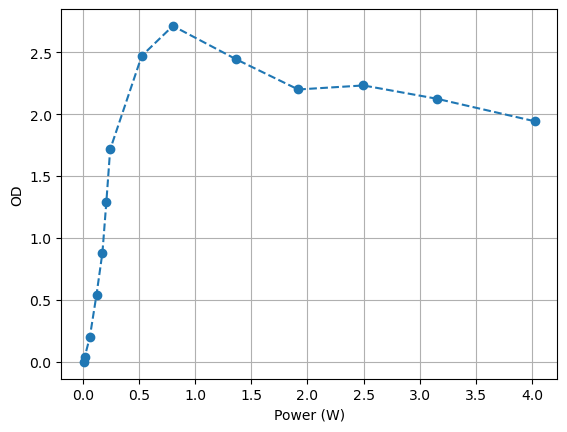

In [6]:
def gaussian_OD(x, amplitude, xo, sigma, bias = 0):
    xo = float(xo)
    g = amplitude * np.exp(-( (x - xo)**2 / (2* sigma**2) )) + bias
    return np.exp(-g)

popt = np.zeros((img_1D.shape[0],4))
print(len(img_1D))
for i in range(len(img_1D)-1):
    print(i)
    popt1, pcov1 = curve_fit(gaussian_OD, x, ab_1D[i+1,:],p0=[0.1,700,100,0])
    popt[i+1,:] = popt1#np.array(popt1)
print(popt.shape)
# power =np.array([0.1,0.358,0.7,1.0, 1.2,1.394,3,4.584,7.82,10.96,14.28,18,23] )*5.6/32
power =np.array([0.06,0.1,0.358,0.7,1.0, 1.2,1.394,3,4.584,7.82,10.96,14.28,18,23] )*5.6/32
plt.plot(power, popt[:,0],'o--')
plt.xlabel('Power (W)')
plt.ylabel('OD')
# plt.ylim([0,4.3])
plt.grid()
# plt.xlim([0,1000])
